In [ ]:
# 데이터 불러오기
# Load data

import pandas as pd

file_path = "/content/sample_data/green_tripdata_2024-03.parquet"
df = pd.read_parquet(file_path)

In [ ]:
# 데이터 확인
# Inspect the data
print(df.head())
print(df.tail())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2024-03-01 00:10:52   2024-03-01 00:26:12                  N   
1         2  2024-03-01 00:22:21   2024-03-01 00:35:15                  N   
2         2  2024-03-01 00:45:27   2024-03-01 01:04:32                  N   
3         1  2024-03-01 00:02:00   2024-03-01 00:23:45                  N   
4         2  2024-03-01 00:16:45   2024-03-01 00:23:25                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           129           226              1.0           1.72   
1         1.0           130           218              1.0           3.25   
2         1.0           255           107              2.0           4.58   
3         1.0           181            71              1.0           0.00   
4         1.0            95           135              1.0           1.15   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0  

In [ ]:
# 누락치(결측치) 확인
# Check for missing values

print(df.isnull().sum())


# 데이터 타입 확인
# inspect data types

print(df.dtypes)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        2097
RatecodeID                2097
PULocationID                 0
DOLocationID                 0
passenger_count           2097
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                57457
improvement_surcharge        0
total_amount                 0
payment_type              2097
trip_type                 2104
congestion_surcharge      2097
dtype: int64
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_am

In [ ]:
# 이동시간 칼럼 생성, 도착시간 칼럼 처리
# Create trip duration column and process dropoff time column

df["trip_duration"] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df = df.drop(columns=['lpep_dropoff_datetime'], errors='ignore')
df

,VendorID,lpep_pickup_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2024-03-01 00:10:52,N,1.0,129,226,1.0,1.72,12.80,1.0,0.5,3.06,0.00,NaN,1.0,18.36,1.0,1.0,0.00,15.333333
1,2,2024-03-01 00:22:21,N,1.0,130,218,1.0,3.25,17.70,1.0,0.5,0.00,0.00,NaN,1.0,20.20,2.0,1.0,0.00,12.900000
2,2,2024-03-01 00:45:27,N,1.0,255,107,2.0,4.58,23.30,1.0,0.5,3.50,0.00,NaN,1.0,32.05,1.0,1.0,2.75,19.083333
3,1,2024-03-01 00:02:00,N,1.0,181,71,1.0,0.00,22.50,0.0,1.5,0.00,0.00,NaN,1.0,24.00,1.0,1.0,0.00,21.750000
4,2,2024-03-01 00:16:45,N,1.0,95,135,1.0,1.15,8.60,1.0,0.5,1.00,0.00,NaN,1.0,12.10,1.0,1.0,0.00,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57452,2,2024-03-31 21:19:00,None,NaN,25,61,NaN,1.45,12.08,0.0,0.0,2.52,0.00,NaN,1.0,15.60,NaN,NaN,NaN,11.000000
57453,2,2024-03-31 22:30:00,None,NaN,41,42,NaN,1.13,12.24,0.0,0.0,0.00,0.00,NaN,1.0,13.24,NaN,NaN,NaN,5.000000
57454,2,2024-03-31 22:43:00,None,NaN,223,7,NaN,13062.08,12.08,0.0,0.0,3.77,0.00,NaN,1.0,16.85,NaN,NaN,NaN,5.000000
57455,2,2024-03-31 22:48:00,None,NaN,42,249,NaN,7.96,40.52,0.0,0.0,8.75,0.00,NaN,1.0,53.02,NaN,NaN,NaN,24.000000


In [ ]:
# 모든 값이 결측치인 칼럼 제외
# Drop columns that contain only missing values

df = df.dropna(axis=1, how="all")

# 무의미한 칼럼 제외
# Drop meaningless columns

df = df.drop(columns=["PULocationID", "DOLocationID", "VendorID"], errors="ignore")

df

,lpep_pickup_datetime,store_and_fwd_flag,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2024-03-01 00:10:52,N,1.0,1.0,1.72,12.80,1.0,0.5,3.06,0.00,1.0,18.36,1.0,1.0,0.00,15.333333
1,2024-03-01 00:22:21,N,1.0,1.0,3.25,17.70,1.0,0.5,0.00,0.00,1.0,20.20,2.0,1.0,0.00,12.900000
2,2024-03-01 00:45:27,N,1.0,2.0,4.58,23.30,1.0,0.5,3.50,0.00,1.0,32.05,1.0,1.0,2.75,19.083333
3,2024-03-01 00:02:00,N,1.0,1.0,0.00,22.50,0.0,1.5,0.00,0.00,1.0,24.00,1.0,1.0,0.00,21.750000
4,2024-03-01 00:16:45,N,1.0,1.0,1.15,8.60,1.0,0.5,1.00,0.00,1.0,12.10,1.0,1.0,0.00,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57452,2024-03-31 21:19:00,None,NaN,NaN,1.45,12.08,0.0,0.0,2.52,0.00,1.0,15.60,NaN,NaN,NaN,11.000000
57453,2024-03-31 22:30:00,None,NaN,NaN,1.13,12.24,0.0,0.0,0.00,0.00,1.0,13.24,NaN,NaN,NaN,5.000000
57454,2024-03-31 22:43:00,None,NaN,NaN,13062.08,12.08,0.0,0.0,3.77,0.00,1.0,16.85,NaN,NaN,NaN,5.000000
57455,2024-03-31 22:48:00,None,NaN,NaN,7.96,40.52,0.0,0.0,8.75,0.00,1.0,53.02,NaN,NaN,NaN,24.000000


In [ ]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,52910
5.0,2237
2.0,129
4.0,47
3.0,30
99.0,7


In [ ]:
# 시간 관련 피처 생성
# Create time-related features

df["pickup_hour"] = df['lpep_pickup_datetime'].dt.hour
df["pickup_dayofweek"] = df['lpep_pickup_datetime'].dt.dayofweek
df["pickup_day"] = df['lpep_pickup_datetime'].dt.day
df["pickup_month"] = df['lpep_pickup_datetime'].dt.month

df["time_delta"] = df['lpep_pickup_datetime'].diff().dt.total_seconds() / 60

# 주말 및 공휴일(여기서는 해당없음)
# Weekend and holidays(not applicable here)

df["is_weekend"] = df["pickup_dayofweek"].isin([5, 6]).astype(int)

In [ ]:
# 피처 엔지니어링을 위해 가장 상관도 높은 수치칼럼 추출
# Select numerical columns with the highest correlation for feature engineering

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
high_corr_cols = corr_matrix['trip_duration'].drop('trip_duration').abs().sort_values(ascending=False)
top_col = high_corr_cols.index[0]
print(top_col)

fare_amount


In [ ]:
print(type(top_col))

<class 'str'>


In [ ]:
# 피처 엔지니어링
# Feature engineering

import numpy as np

# tolerance 계산
# calculate tolerance
median_delta = df["time_delta"].median()
tolerance_minutes = median_delta * 1.5
tolerance = pd.Timedelta(minutes=tolerance_minutes)

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime']).astype('datetime64[ns]')
lag_cols = ['trip_duration'] + [top_col]  # 타겟 + 타깃과 상관 높은 칼럼 target + Columns highly correlated with the target
lag_hours = [1, 2, 3]  # 시차 time lag
rolling_hours = [3, 6, 12]   # rolling window
diff_hours = [1, 2, 3]

# lag 피처 생성
# Create lag features

for col in lag_cols:
    for h in lag_hours:
        # target_time 생성
        # create target_time
        target_time = df['lpep_pickup_datetime'] - pd.Timedelta(hours=h)

        # 왼쪽 DataFrame: target_time 기준
        # Left DataFrame: based on target_time
        left = pd.DataFrame({
            'target_time': target_time,
            col: df[col]
        }).sort_values('target_time')

        # 오른쪽 DataFrame Right DataFrame
        right = df[['lpep_pickup_datetime', col]].rename(columns={col:'lag_value'}).sort_values('lpep_pickup_datetime')

        lag = pd.merge_asof(
            left,
            right,
            left_on='target_time',
            right_on='lpep_pickup_datetime',
            direction='backward',
            tolerance=tolerance
        )

        df[f'{col}_lag{h}h'] = lag['lag_value'].fillna(method='ffill')


# Diff 피처 생성
# Create Diff features

for col in lag_cols:
    for h in diff_hours:
        target_time = df['lpep_pickup_datetime'] - pd.Timedelta(hours=h)

        left = pd.DataFrame({
            'target_time': target_time,
            col: df[col]
        }).sort_values('target_time')

        right = df[['lpep_pickup_datetime', col]].rename(columns={col:'lag_value'}).sort_values('lpep_pickup_datetime')

        lag = pd.merge_asof(
            left,
            right,
            left_on='target_time',
            right_on='lpep_pickup_datetime',
            direction='backward',
            tolerance=tolerance
        )
        df[f'{col}_diff{h}h_per_min'] = (df[col] - lag['lag_value']) / (h * 60)  # 분 단위 변화율 Rate of change per minute
        df[f'{col}_diff{h}h_per_min'] = df[f'{col}_diff{h}h_per_min'].fillna(0)

# Rolling 피처 생성
# Create Rolling features

df = df.sort_values('lpep_pickup_datetime').reset_index(drop=True)

for col in lag_cols:
    ts = df.set_index('lpep_pickup_datetime')[col]   # 시계열 잠시 인덱스화 Temporarily set the time column as index

    for h in rolling_hours:
        df[f'{col}_rolling_mean{h}h'] = (
            ts.rolling(f'{h}H', min_periods=1).mean().reset_index(drop=True)
        )
        df[f'{col}_rolling_std{h}h'] = (
            ts.rolling(f'{h}H', min_periods=1).std().reset_index(drop=True)
        )

# 순환적 인코딩 (sin, cos)
# cyclical encoding (sin, cos)

df['hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['pickup_day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['pickup_day'] / 31)

df['dow_sin'] = np.sin(2 * np.pi * df['pickup_dayofweek'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['pickup_dayofweek'] / 7)

df['month_sin'] = np.sin(2 * np.pi * df['pickup_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['pickup_month'] / 12)

assert 'lpep_pickup_datetime' in df.columns, "datetime 컬럼이 사라졌습니다!"
print("🔥 Feature engineering 완료 — datetime 안전하게 유지됨")

/tmp/ipython-input-3991213268.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{col}_lag{h}h'] = lag['lag_value'].fillna(method='ffill')
/tmp/ipython-input-3991213268.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{col}_lag{h}h'] = lag['lag_value'].fillna(method='ffill')
/tmp/ipython-input-3991213268.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{col}_lag{h}h'] = lag['lag_value'].fillna(method='ffill')
/tmp/ipython-input-3991213268.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{col}_lag{h}h'] = lag['lag_value'].fillna(method='ffill')
/tmp/ipython-input-3991213268.py:42: FutureWarning: Series.f

🔥 Feature engineering 완료 — datetime 안전하게 유지됨


/tmp/ipython-input-3991213268.py:81: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.rolling(f'{h}H', min_periods=1).std().reset_index(drop=True)
/tmp/ipython-input-3991213268.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.rolling(f'{h}H', min_periods=1).mean().reset_index(drop=True)
/tmp/ipython-input-3991213268.py:81: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.rolling(f'{h}H', min_periods=1).std().reset_index(drop=True)
/tmp/ipython-input-3991213268.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.rolling(f'{h}H', min_periods=1).mean().reset_index(drop=True)
/tmp/ipython-input-3991213268.py:81: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.rolling(f'{h}H', min_periods=1).std().reset_index(drop

In [ ]:
df.isna().sum()
# 결측치 확인결과 19칼럼
# store_and_fwd_flag: object니까 최빈값으로
# Ratecode: 숫자범주인데 의미없는숫자니까 최빈값으로
# passenger_count: 숫자범주 중앙값으로
# payment_type: 숫자범주 최빈값으로
# trip_type: 숫자범주 최빈값으로
# congestion_surcharge: 숫자범주 중앙값으로
# time_delta: 처음이니까 0으로
# trip_duration_lag1h: 연속수치 보간법
# trip_duration_lag2h: 연속수치 보간법
# trip_duration_lag3h: 연속수치 보간법
# fare_amount_lag1h: 연속수치 보간법
# fare_amount_lag2h: 연속수치 보간법
# fare_amount_lag3h: 연속수치 보간법
# trip_duration_rolling_std3h: 연속수치 보간법
# trip_duration_rolling_std6h: 연속수치 보간법
# trip_duration_rolling_std12h: 연속수치 보간법
# fare_amount_rolling_std3h: 연속수치 보간법
# fare_amount_rolling_std6h: 연속수치 보간법
# fare_amount_rolling_std12h: 연속수치 보간법

# Missing value handling for 19 columns
# store_and_fwd_flag: categorical (object) → fill with mode
# Ratecode: numerical categorical, meaningless codes → fill with mode
# passenger_count: numerical categorical → fill with median
# payment_type: numerical categorical → fill with mode
# trip_type: numerical categorical → fill with mode
# congestion_surcharge: numerical categorical → fill with median
# time_delta: initial value → fill with 0
# trip_duration_lag1h: continuous numeric → fill using interpolation
# trip_duration_lag2h: continuous numeric → fill using interpolation
# trip_duration_lag3h: continuous numeric → fill using interpolation
# fare_amount_lag1h: continuous numeric → fill using interpolation
# fare_amount_lag2h: continuous numeric → fill using interpolation
# fare_amount_lag3h: continuous numeric → fill using interpolation
# trip_duration_rolling_std3h: continuous numeric → fill using interpolation
# trip_duration_rolling_std6h: continuous numeric → fill using interpolation
# trip_duration_rolling_std12h: continuous numeric → fill using interpolation
# fare_amount_rolling_std3h: continuous numeric → fill using interpolation
# fare_amount_rolling_std6h: continuous numeric → fill using interpolation
# fare_amount_rolling_std12h: continuous numeric → fill using interpolation

,0
lpep_pickup_datetime,0
store_and_fwd_flag,2097
RatecodeID,2097
passenger_count,2097
trip_distance,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [ ]:
# 결측치 처리
# Handle missing values

# 범주형(object) → 최빈값
# Categorical (object) features → fill with mode

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

# 숫자형 범주 → 최빈값 혹은 중앙값
# Numerical categorical features → fill with mode or median

df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])
df['trip_type'] = df['trip_type'].fillna(df['trip_type'].mode()[0])
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

# 시계열 관련 값 → 처음값 등
# Time series related features → fill with initial values, etc.

df['time_delta'] = df['time_delta'].fillna(0)

# lag / rolling / diff 칼럼 → 연속값이므로 보간법
# Lag, rolling, and diff columns: continuous values → fill using interpolation

lag_rolling_cols = [
    'trip_duration_lag1h', 'trip_duration_lag2h', 'trip_duration_lag3h',
    'fare_amount_lag1h', 'fare_amount_lag2h', 'fare_amount_lag3h',
    'trip_duration_rolling_std3h', 'trip_duration_rolling_std6h', 'trip_duration_rolling_std12h',
    'fare_amount_rolling_std3h', 'fare_amount_rolling_std6h', 'fare_amount_rolling_std12h'
]

for col in lag_rolling_cols:
    # NaN이 몇 개 정도밖에 안되면 0으로 채워도 무방
    # If only a few NaNs, it is safe to fill with 0
    if df[col].isna().sum() <= 10:
        df[col] = df[col].fillna(0)
    else:
        # 연속값 보간법
        # Interpolation for continuous values
        df[col] = df[col].interpolate(method='linear')
        # 그래도 맨 앞/뒤 NaN 남아있으면 채우기
        # Fill any remaining NaNs at the beginning or end
        df[col] = df[col].fillna(method='bfill').fillna(method='ffill')


/tmp/ipython-input-415266706.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='bfill').fillna(method='ffill')


In [ ]:
# 결측치 처리 확인
# Verify missing value handling

df.isnull().sum()

,0
lpep_pickup_datetime,0
store_and_fwd_flag,0
RatecodeID,0
passenger_count,0
trip_distance,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [ ]:
# 시간 기준 재정렬
# Reorder by time

df = df.sort_values('lpep_pickup_datetime').reset_index(drop=True)

In [ ]:
# 중복 기능 칼럼 제거
# Remove duplicate feature columns

df = df.drop(columns=['lpep_pickup_datetime', 'pickup_hour', 'pickup_dayofweek', 'pickup_month', 'pickup_day'])

In [ ]:
df.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'trip_duration', 'time_delta', 'is_weekend',
       'trip_duration_lag1h', 'trip_duration_lag2h', 'trip_duration_lag3h',
       'fare_amount_lag1h', 'fare_amount_lag2h', 'fare_amount_lag3h',
       'trip_duration_diff1h_per_min', 'trip_duration_diff2h_per_min',
       'trip_duration_diff3h_per_min', 'fare_amount_diff1h_per_min',
       'fare_amount_diff2h_per_min', 'fare_amount_diff3h_per_min',
       'trip_duration_rolling_mean3h', 'trip_duration_rolling_std3h',
       'trip_duration_rolling_mean6h', 'trip_duration_rolling_std6h',
       'trip_duration_rolling_mean12h', 'trip_duration_rolling_std12h',
       'fare_amount_rolling_mean3h', 'fare_amount_rolling_std3h',
       'fare_amount_rolling_mean6h', 'fare_amount_rolling_std6h',

In [ ]:
print(len(df.columns))

49


In [ ]:
df['trip_type'].value_counts()

,count
trip_type,
1.0,55351
2.0,2106


In [ ]:
# 인코딩 방식 분류
# Classify encoding strategy

In [ ]:
# 'store_and_fwd_flag': 레이블인코딩
# 'RatecodeID': 원핫
# 'passenger_count': 원핫
# 'trip_distance': minmax스케일링
# 'fare_amount':  minmax스케일링
# 'extra': 원핫
# 'mta_tax': 원핫
# 'tip_amount': minmax스케일링
# 'tolls_amount': 레이블인코딩(많은 카테고리) + 임베딩
# 'improvement_surcharge': 원핫
# 'total_amount': minmax스케일링
# 'payment_type': 원핫
# 'trip_type': 1.0, 2.0 으로 이진분류되있으니까 0,1로 매핑
# 'congestion_surcharge': 원핫
# 'trip_duration': minmax스케일링
# 'time_delta': minmax스케일링
# 'is_weekend': 0,1로 이진분류 되있어서 냅둠
# 'trip_duration_lag1h': minmax스케일링
# 'trip_duration_lag2h': minmax스케일링
# 'trip_duration_lag3h': minmax스케일링
# 'fare_amount_lag1h': minmax스케일링
# 'fare_amount_lag2h': minmax스케일링
# 'fare_amount_lag3h': minmax스케일링
# 'trip_duration_diff1h_per_min': minmax스케일링
# 'trip_duration_diff2h_per_min': minmax스케일링
# 'trip_duration_diff3h_per_min': minmax스케일링
# 'fare_amount_diff1h_per_min': minmax스케일링
# 'fare_amount_diff2h_per_min': minmax스케일링
# 'fare_amount_diff3h_per_min': minmax스케일링
# 'trip_duration_rolling_mean3h': minmax스케일링
# 'trip_duration_rolling_std3h': minmax스케일링
# 'trip_duration_rolling_mean6h': minmax스케일링
# 'trip_duration_rolling_std6h': minmax스케일링
# 'trip_duration_rolling_mean12h': minmax스케일링
# 'trip_duration_rolling_std12h': minmax스케일링
# 'fare_amount_rolling_mean3h': minmax스케일링
# 'fare_amount_rolling_std3h': minmax스케일링
# 'fare_amount_rolling_mean6h': minmax스케일링
# 'fare_amount_rolling_std6h': minmax스케일링
# 'fare_amount_rolling_mean12h': minmax스케일링
# 'fare_amount_rolling_std12h': minmax스케일링
# 'hour_sin': 인코딩 되있음
# 'hour_cos': 인코딩 되있음
# 'day_sin': 인코딩 되있음
# 'day_cos': 인코딩 되있음
# 'dow_sin': 인코딩 되있음
# 'dow_cos': 인코딩 되있음
# 'month_sin': 인코딩 되있음
# 'month_cos': 인코딩 되있음

# Feature encoding and scaling methods:

# 'store_and_fwd_flag': Label Encoding
# 'RatecodeID': One-hot Encoding
# 'passenger_count': One-hot Encoding
# 'trip_distance': Min-Max Scaling
# 'fare_amount': Min-Max Scaling
# 'extra': One-hot Encoding
# 'mta_tax': One-hot Encoding
# 'tip_amount': Min-Max Scaling
# 'tolls_amount': Label Encoding (many categories) + Embedding
# 'improvement_surcharge': One-hot Encoding
# 'total_amount': Min-Max Scaling
# 'payment_type': One-hot Encoding
# 'trip_type': Binary mapping (1.0, 2.0 → 0, 1)
# 'congestion_surcharge': One-hot Encoding
# 'trip_duration': Min-Max Scaling
# 'time_delta': Min-Max Scaling
# 'is_weekend': Already binary (0,1), no change
# 'trip_duration_lag1h': Min-Max Scaling
# 'trip_duration_lag2h': Min-Max Scaling
# 'trip_duration_lag3h': Min-Max Scaling
# 'fare_amount_lag1h': Min-Max Scaling
# 'fare_amount_lag2h': Min-Max Scaling
# 'fare_amount_lag3h': Min-Max Scaling
# 'trip_duration_diff1h_per_min': Min-Max Scaling
# 'trip_duration_diff2h_per_min': Min-Max Scaling
# 'trip_duration_diff3h_per_min': Min-Max Scaling
# 'fare_amount_diff1h_per_min': Min-Max Scaling
# 'fare_amount_diff2h_per_min': Min-Max Scaling
# 'fare_amount_diff3h_per_min': Min-Max Scaling
# 'trip_duration_rolling_mean3h': Min-Max Scaling
# 'trip_duration_rolling_std3h': Min-Max Scaling
# 'trip_duration_rolling_mean6h': Min-Max Scaling
# 'trip_duration_rolling_std6h': Min-Max Scaling
# 'trip_duration_rolling_mean12h': Min-Max Scaling
# 'trip_duration_rolling_std12h': Min-Max Scaling
# 'fare_amount_rolling_mean3h': Min-Max Scaling
# 'fare_amount_rolling_std3h': Min-Max Scaling
# 'fare_amount_rolling_mean6h': Min-Max Scaling
# 'fare_amount_rolling_std6h': Min-Max Scaling
# 'fare_amount_rolling_mean12h': Min-Max Scaling
# 'fare_amount_rolling_std12h': Min-Max Scaling
# 'hour_sin': Already encoded
# 'hour_cos': Already encoded
# 'day_sin': Already encoded
# 'day_cos': Already encoded
# 'dow_sin': Already encoded
# 'dow_cos': Already encoded
# 'month_sin': Already encoded
# 'month_cos': Already encoded

In [ ]:
df['trip_type'] = df['trip_type'].map({1.0:0, 2.0:1})

In [ ]:
df['trip_type'].value_counts()

,count
trip_type,
0,55351
1,2106


In [ ]:
# 원핫 인코딩 대상
# Columns to be one-hot encoded

one_hot_cols = [
    'RatecodeID', 'extra', 'mta_tax',
    'improvement_surcharge', 'payment_type', 'congestion_surcharge'
]

# MinMax 스케일링 대상 (연속형)
# Continuous columns for Min-Max scaling

scaling_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount','time_delta',
    'trip_duration_lag1h','trip_duration_lag2h','trip_duration_lag3h',
    'fare_amount_lag1h','fare_amount_lag2h','fare_amount_lag3h',
    'trip_duration_diff1h_per_min','trip_duration_diff2h_per_min','trip_duration_diff3h_per_min',
    'fare_amount_diff1h_per_min','fare_amount_diff2h_per_min','fare_amount_diff3h_per_min',
    'trip_duration_rolling_mean3h','trip_duration_rolling_std3h',
    'trip_duration_rolling_mean6h','trip_duration_rolling_std6h',
    'trip_duration_rolling_mean12h','trip_duration_rolling_std12h',
    'fare_amount_rolling_mean3h','fare_amount_rolling_std3h',
    'fare_amount_rolling_mean6h','fare_amount_rolling_std6h',
    'fare_amount_rolling_mean12h','fare_amount_rolling_std12h'
]

# 레이블 인코딩 + 임베딩 대상
# Columns to be label-encoded + embedded
embedding_cols = [
    'store_and_fwd_flag', 'tolls_amount'
]

# 타겟 칼럼
# Target column
target_col = 'trip_duration'

In [ ]:
# train/val/test 분할
# Split data into Train, Validation, and Test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Ordinal 인코딩 학습
# Train Ordinal encoding
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_enc.fit(df[embedding_cols])

train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

X = df.drop(columns=[target_col])
y = df[target_col].values.reshape(-1,1)  # y도 MinMax 스케일링 대상 y is also subject to Min-Max scaling

# 먼저 train + temp(val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_ratio, shuffle=False)
val_test_ratio = val_ratio / (val_ratio + test_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=val_test_ratio, shuffle=False)

# Ordinal 인코딩 변환 (임베딩용)
# Ordinal-encoding convert for embedding

X_train[embedding_cols] = ordinal_enc.transform(X_train[embedding_cols])
X_val[embedding_cols]   = ordinal_enc.transform(X_val[embedding_cols])
X_test[embedding_cols]  = ordinal_enc.transform(X_test[embedding_cols])

# unknown_index변환
# convert unknown_index
for col in embedding_cols:
    vocab_size = len(ordinal_enc.categories_[embedding_cols.index(col)])  # 실제 카테고리 수 Actual categories number
    max_index = vocab_size  # 마지막 index (Unknown index 자리)

    X_train[col] = X_train[col].clip(0, max_index)
    X_val[col]   = X_val[col].clip(0, max_index)
    X_test[col]  = X_test[col].clip(0, max_index)

# 원핫인코딩
# One-hot encoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[one_hot_cols])

X_train_ohe = pd.DataFrame(ohe.transform(X_train[one_hot_cols]), columns=ohe.get_feature_names_out(one_hot_cols), index=X_train.index)
X_val_ohe   = pd.DataFrame(ohe.transform(X_val[one_hot_cols]), columns=ohe.get_feature_names_out(one_hot_cols), index=X_val.index)
X_test_ohe  = pd.DataFrame(ohe.transform(X_test[one_hot_cols]), columns=ohe.get_feature_names_out(one_hot_cols), index=X_test.index)

# 기존 원핫 컬럼 제거 후 합치기
# Drop original one-hot columns and merge the new encoded columns

X_train = X_train.drop(columns=one_hot_cols).join(X_train_ohe)
X_val   = X_val.drop(columns=one_hot_cols).join(X_val_ohe)
X_test  = X_test.drop(columns=one_hot_cols).join(X_test_ohe)

# 연속형 MinMax 스케일링
# MinMax scaling numeric
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_X.fit(X_train[scaling_cols])

X_train[scaling_cols] = scaler_X.transform(X_train[scaling_cols])
X_val[scaling_cols]   = scaler_X.transform(X_val[scaling_cols])
X_test[scaling_cols]  = scaler_X.transform(X_test[scaling_cols])

# 타겟도 MinMax 스케일링
# MinMax scaling target as well
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_val   = scaler_y.transform(y_val)
y_test  = scaler_y.transform(y_test)

In [ ]:
X_train.columns

Index(['store_and_fwd_flag', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_type', 'time_delta',
       'is_weekend', 'trip_duration_lag1h', 'trip_duration_lag2h',
       'trip_duration_lag3h', 'fare_amount_lag1h', 'fare_amount_lag2h',
       'fare_amount_lag3h', 'trip_duration_diff1h_per_min',
       'trip_duration_diff2h_per_min', 'trip_duration_diff3h_per_min',
       'fare_amount_diff1h_per_min', 'fare_amount_diff2h_per_min',
       'fare_amount_diff3h_per_min', 'trip_duration_rolling_mean3h',
       'trip_duration_rolling_std3h', 'trip_duration_rolling_mean6h',
       'trip_duration_rolling_std6h', 'trip_duration_rolling_mean12h',
       'trip_duration_rolling_std12h', 'fare_amount_rolling_mean3h',
       'fare_amount_rolling_std3h', 'fare_amount_rolling_mean6h',
       'fare_amount_rolling_std6h', 'fare_amount_rolling_mean12h',
       'fare_amount_rolling_std12h', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', '

In [ ]:
embedding_sizes = {}
for i, col in enumerate(embedding_cols):
  n_unique = len(ordinal_enc.categories_[i])
  num_embeddings = n_unique + 1
  embedding_dim = min(50, (num_embeddings)//2)
  embedding_sizes[col] = (num_embeddings, embedding_dim)

print(embedding_sizes)

{'store_and_fwd_flag': (3, 1), 'tolls_amount': (18, 9)}


In [ ]:
import torch
import torch.nn as nn
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 피처 텐서 생성 Feature Tensor Builder
# Create feature tensor with funtion

def build_feature_tensor(X_df, embedding_cols, continuous_cols, model):
  emb_arr = X_df[embedding_cols].values.astype(np.int64)
  for i, col in enumerate(embedding_cols):
    unknown_index = embedding_sizes[col][0] - 1
    emb_arr[:, i][emb_arr[:, i] == -1] = unknown_index
  emb_input = torch.tensor(emb_arr, dtype=torch.long, device=device)

  embedded_vectors = []
  with torch.no_grad():
    for i, col in enumerate(embedding_cols):
        embedded_vectors.append(model.embedding_layers[col](emb_input[:, i]))
  embedded = torch.cat(embedded_vectors, dim=1)

  cont_array = X_df[continuous_cols].replace(np.nan, 0).values.astype(np.float32)
  continuous = torch.tensor(cont_array, dtype=torch.float32, device=device)

  final = torch.cat([embedded, continuous], dim=1)

  return final


class LSTMModel(nn.Module):
  def __init__(self, embedding_sizes, input_dim, hidden_dim=256, num_layers=2):
    super().__init__()

    self.embedding_layers = nn.ModuleDict({
        col: nn.Embedding(num_embeddings, emb_dim, padding_idx=num_embeddings-1)
        for col, (num_embeddings, emb_dim) in embedding_sizes.items()
    })

    self.lstm = nn.LSTM(
        input_dim,
        hidden_dim,
        num_layers=num_layers,
        batch_first=True,
        dropout=0.2,
        bidirectional=True
    )

    self.fc = nn.Linear(hidden_dim * 2, 1)

  def forward(self, x):
    output, _ = self.lstm(x)
    return self.fc(output[:, -1, :])


In [ ]:
# lstm모델 입력을 위한 시퀀스 생성 함수
# Function to create input sequences for LSTM model

def create_sequences(feature_tensor, target_tensor, seq_len=24):
  X_seq, y_seq = [], []

  if not isinstance(target_tensor, torch.Tensor):
    target_tensor = torch.tensor(target_tensor, dtype=torch.float32, device=device)

  for i in range(len(feature_tensor) - seq_len):
    X_seq.append(feature_tensor[i:i+seq_len])
    y_seq.append(target_tensor[i+seq_len])

  return torch.stack(X_seq), torch.tensor(y_seq, dtype=torch.float32, device=device)


continuous_cols = [col for col in X_train.columns if col not in embedding_cols]


# 모델 선언
# Define the model

input_dim = sum(emb_dim for _, emb_dim in embedding_sizes.values()) + len(continuous_cols)
model = LSTMModel(
    embedding_sizes=embedding_sizes,
    input_dim=input_dim,
    hidden_dim=256,
    num_layers=2
).to(device)

# Feature Tensor 생성
# Create feature tensor

train_features = build_feature_tensor(X_train, embedding_cols, continuous_cols, model)
val_features   = build_feature_tensor(X_val,   embedding_cols, continuous_cols, model)
test_features  = build_feature_tensor(X_test,  embedding_cols, continuous_cols, model)

# 시퀀스 변환 (seq_len 24)
# Convert to sequence(length=24)

seq_len = 24
X_train_seq, y_train_seq = create_sequences(train_features, y_train, seq_len)
X_val_seq,   y_val_seq   = create_sequences(val_features, y_val, seq_len)
X_test_seq,  y_test_seq  = create_sequences(test_features, y_test, seq_len)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device:", device)

# Dataset, DataLoader 정의
# Define Dataset, DataLoader

class SequenceDataset(Dataset):
    def __init__(self, X_seq, y_seq):
        self.X = X_seq
        self.y = y_seq

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


batch_size = 32
train_loader = DataLoader(SequenceDataset(X_train_seq, y_train_seq), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(SequenceDataset(X_val_seq, y_val_seq), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(SequenceDataset(X_test_seq, y_test_seq), batch_size=batch_size, shuffle=False)

# Optimizer / Loss 선언
# Defince Optimizer, Loss

criterion = nn.MSELoss()                # 회귀 문제라 MSE 사용 # Use MSE since this is a regression problem
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# EarlyStopping + CheckPoint
best_val_loss = float("inf")
patience = 7
counter = 0
save_path = "best_lstm_model.pth"

# 학습 루프
# Training loop

epochs = 40
train_loss_history = []
val_loss_history = []
for epoch in range(epochs):
    # ---- Train ----
    model.train()
    train_losses = []

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        preds = model(X_batch)  # (batch, 1)
        loss = criterion(preds.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # ---- Validation ----
    model.eval()
    val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            preds = model(X_batch)
            loss = criterion(preds.squeeze(), y_batch)
            val_losses.append(loss.item())

    avg_train = sum(train_losses) / len(train_losses)
    avg_val = sum(val_losses) / len(val_losses)

    # 시각화 위한 리스트
    # List for visualization

    train_loss_history.append(avg_train)
    val_loss_history.append(avg_val)

    print(f"[Epoch {epoch+1}/{epochs}] Train Loss: {avg_train:.5f} | Val Loss: {avg_val:.5f}")

    # ---- EarlyStopping / Checkpoint ----
    if avg_val < best_val_loss:
        best_val_loss = avg_val
        counter = 0
        torch.save(model.state_dict(), save_path)
        print("Model improved → saved.")
    else:
        counter += 1
        print(f"No improvement ({counter}/{patience})")
        if counter >= patience:
            print("Early Stopping triggered")
            break

print("Training finished.")
print(f"Best model saved at: {save_path}")



Device: cuda
[Epoch 1/40] Train Loss: 0.00262 | Val Loss: 0.00239
Model improved → saved.
[Epoch 2/40] Train Loss: 0.00257 | Val Loss: 0.00235
Model improved → saved.
[Epoch 3/40] Train Loss: 0.00256 | Val Loss: 0.00254
No improvement (1/7)
[Epoch 4/40] Train Loss: 0.00256 | Val Loss: 0.00236
No improvement (2/7)
[Epoch 5/40] Train Loss: 0.00256 | Val Loss: 0.00238
No improvement (3/7)
[Epoch 6/40] Train Loss: 0.00256 | Val Loss: 0.00236
No improvement (4/7)
[Epoch 7/40] Train Loss: 0.00256 | Val Loss: 0.00236
No improvement (5/7)
[Epoch 8/40] Train Loss: 0.00256 | Val Loss: 0.00236
No improvement (6/7)
[Epoch 9/40] Train Loss: 0.00256 | Val Loss: 0.00236
No improvement (7/7)
Early Stopping triggered
Training finished.
Best model saved at: best_lstm_model.pth


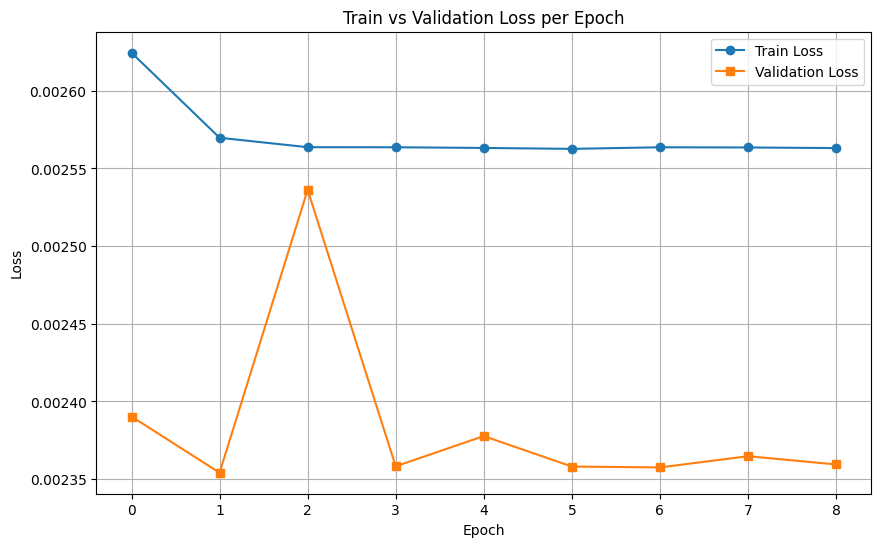

In [ ]:
# Loss 시각화 비교
# Loss compare by visualizing
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train_loss_history, label='Train Loss', marker='o')
plt.plot(val_loss_history, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델 가중치 로드, 테스트 데이터로 평가
# Load model weights and evaluate on test data

model.load_state_dict(torch.load(save_path))
model.eval()
epsilon_list = [0.05, 0.10] # 허용 오차 범위 Acceptable error range
test_losses = []
accuracy_dict = {eps: [] for eps in epsilon_list}

with torch.no_grad():
  for X_batch, y_batch in test_loader:
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    preds = model(X_batch)
    loss = criterion(preds.squeeze(), y_batch)
    test_losses.append(loss.item())

    # 허용 오차 accuracy 계산
    # # Calculate accuracy within the tolerance range
    for eps in epsilon_list:
      correct = (torch.abs(preds.squeeze() - y_batch) <= eps * y_batch).float().mean()
      accuracy_dict[eps].append(correct.item())

avg_loss = sum(test_losses) / len(test_losses)
avg_acc = {eps: sum(vals)/len(vals) for eps, vals in accuracy_dict.items()}

print(f"Test MSE Loss = {avg_loss:.5f}")
for eps, acc in avg_acc.items():
    print(f"Accuracy within {int(eps*100)}% tolerance = {acc:.3f}")

Test MSE Loss = 0.00215
Accuracy within 5% tolerance = 0.043
Accuracy within 10% tolerance = 0.090


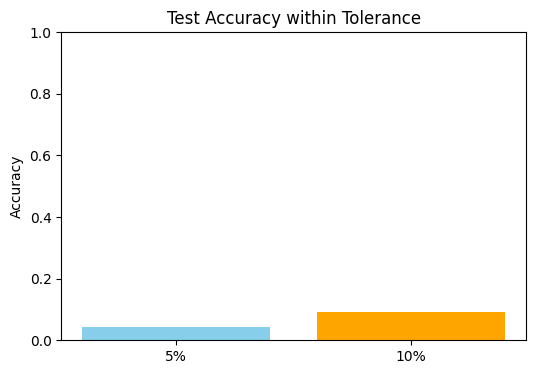

In [ ]:
# 시각화
# Visualization

eps_labels = [f'{int(e*100)}%' for e in epsilon_list]
acc_values = [avg_acc[eps] for eps in epsilon_list]

plt.figure(figsize=(6,4))
plt.bar(eps_labels, acc_values, color=['skyblue','orange'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Test Accuracy within Tolerance')
plt.show()

In [ ]:
# 원래 단위에서 테스트 데이터 평가
# Evaluate test data in original units

# 테스트 데이터로 평가 (원래 단위 기준)
# Test evaluation in the original scale

model.load_state_dict(torch.load(save_path))
model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        preds = model(X_batch).squeeze()
        all_preds.append(preds.cpu().numpy())
        all_targets.append(y_batch.cpu().numpy())

# 하나로 합치기
# unify as one
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)

# 스케일 원상복귀
# Revert scaling
all_preds_orig = scaler_y.inverse_transform(all_preds.reshape(-1,1)).flatten()
all_targets_orig = scaler_y.inverse_transform(all_targets.reshape(-1,1)).flatten()

# MSE 계산
# Calculate MSE
mse = np.mean((all_preds_orig - all_targets_orig)**2)

# 허용 오차 Accuracy
# tolerance range accuracy
tolerance_5 = np.mean(np.abs(all_preds_orig - all_targets_orig) / all_targets_orig <= 0.05)
tolerance_10 = np.mean(np.abs(all_preds_orig - all_targets_orig) / all_targets_orig <= 0.10)

print(f"Test MSE Loss (original unit) = {mse:.2f}")
print(f"Accuracy within 5% tolerance = {tolerance_5:.3f}")
print(f"Accuracy within 10% tolerance = {tolerance_10:.3f}")

Test MSE Loss (original unit) = 4469.85
Accuracy within 5% tolerance = 0.044
Accuracy within 10% tolerance = 0.090


/tmp/ipython-input-1858904007.py:31: RuntimeWarning: divide by zero encountered in divide
  tolerance_5 = np.mean(np.abs(all_preds_orig - all_targets_orig) / all_targets_orig <= 0.05)
/tmp/ipython-input-1858904007.py:32: RuntimeWarning: divide by zero encountered in divide
  tolerance_10 = np.mean(np.abs(all_preds_orig - all_targets_orig) / all_targets_orig <= 0.10)
